In [1]:
!pip install spacy
!pip install newsapi-python

In [2]:
!python -m spacy download en_core_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [12]:
# Author: Kenny Chhoeun
# CS 4650 Big Data Analytics
# HW 5
import spacy
nlp_eng = spacy.load('en_core_web_lg')

In [4]:
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='7b07f902e50f463db5140a5c9e156d8f')

In [5]:
articles = []
for x in range(1,5):
  articles.append(newsapi.get_everything(q='coronavirus', language='en', from_param='2021-02-19', to='2021-03-18', sort_by='relevancy', page=x))

In [6]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [9]:
import pandas as pd

dados = []

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        # removed the [0] from title, data, and description since it only returns the first character
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
        
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...
2,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ..."
3,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...
4,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...


In [10]:
result = []
results = []
pos_tag = ['VERB', 'NOUN', 'PROPN']

import collections, string
Counter = collections.Counter
punctuation = string.punctuation

def get_keywords_eng(content):
  doc = nlp_eng(content)
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if(token.pos_ in pos_tag):
      result.append(token.text)
  return result

for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

#insert new data into dataframe and save 
df.to_csv(r'dataset.csv')
df


,title,date,desc,content,keywords
0,Coronavirus Briefing: What Happened Today,2021-03-12T23:12:19Z,An optimistic view of the weeks ahead.,What do you think the next few months look lik...,"[#going, #think, #months, #look, #U.S.]"
1,"Your N.B.A. Coronavirus Questions, Answered",2021-03-11T22:49:26Z,Can fans attend all games? Will players be vac...,Why havent I seen Wayne Knight in the ads for ...,"[#going, #think, #months, #chars, #Knight]"
2,Coronavirus Briefing: What Happened Today,2021-03-11T23:32:45Z,"Israel’s reopening, and vaccine doses in limbo.","How is the Green Passport system working, for ...","[#going, #chars, #think, #months, #Knight]"
3,Coronavirus Briefing: What Happened Today,2021-03-16T22:21:05Z,The U.S. political divide is affecting its vac...,Similar laborious efforts may have to be scale...,"[#chars, #going, #think, #months, #Knight]"
4,Coronavirus Briefing: What Happened Today,2021-03-09T23:04:24Z,People with underlying conditions are begging ...,But medical ethicists say the list is misleadi...,"[#chars, #going, #think, #months, #Knight]"
...,...,...,...,...,...
75,Covid-Battered Texas Faces Costly Recovery Aft...,2021-02-22T23:07:34Z,"Basics remain scarce in some parts of Texas, a...","It was just crisis after crisis, said Chris Me...","[#chars, #said, #image, #coronavirus, #vaccine]"
76,Pandemic Insurance Helped the N.C.A.A. Tournam...,2021-02-26T22:05:06Z,Event cancellation insurance is a specialized ...,The N.C.A.A. has been buying coverage for its ...,"[#chars, #said, #image, #coronavirus, #vaccine]"
77,"At America’s Cup, Auckland Laments the Boats T...",2021-03-04T15:30:07Z,With strict coronavirus rules keeping out supe...,"One superyacht agent, Mark Wightman, said he h...","[#chars, #said, #image, #coronavirus, #vaccine]"
78,Texas and Other States Reopen as Covid Cases Fall,2021-03-02T21:48:28Z,"As coronavirus cases fall, states are rescindi...",It was an exhilarating feeling to see that hap...,"[#chars, #said, #image, #coronavirus, #year]"


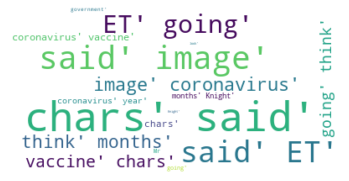

In [11]:
text = str(results)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()